### Name: Prathamesh Rokade
### Class: AIML - C
### Roll No: 57
### Machine Learning Mini Project

### Aim: 
### Choose a dataset of your preference.    
### Perform the EDA      
### Apply a variety of classification algorithms, including Logistic Regression (LR), Naive Bayes (NB), Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Decision Tree (DT), Random Forest (RF), and AdaBoost.
### Assess their performance using classification metrics.
### Compare the performance of the entire classification algorithm.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
df = pd.read_csv('/kaggle/input/heart-attack/Heart Attack Data Set.csv')

In [6]:
# Display the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Display the last few rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Display basic statistics of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Display the shape of the dataset
df.shape

(303, 14)

In [11]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# Check for duplicates
print("Duplicates:\n", df.duplicated().sum())

Duplicates:
 1


In [15]:
# Handle duplicates
df.drop_duplicates(inplace=True)

In [16]:
# Check for duplicates
print("Duplicates:\n", data.duplicated().sum())

Duplicates:
 0


In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


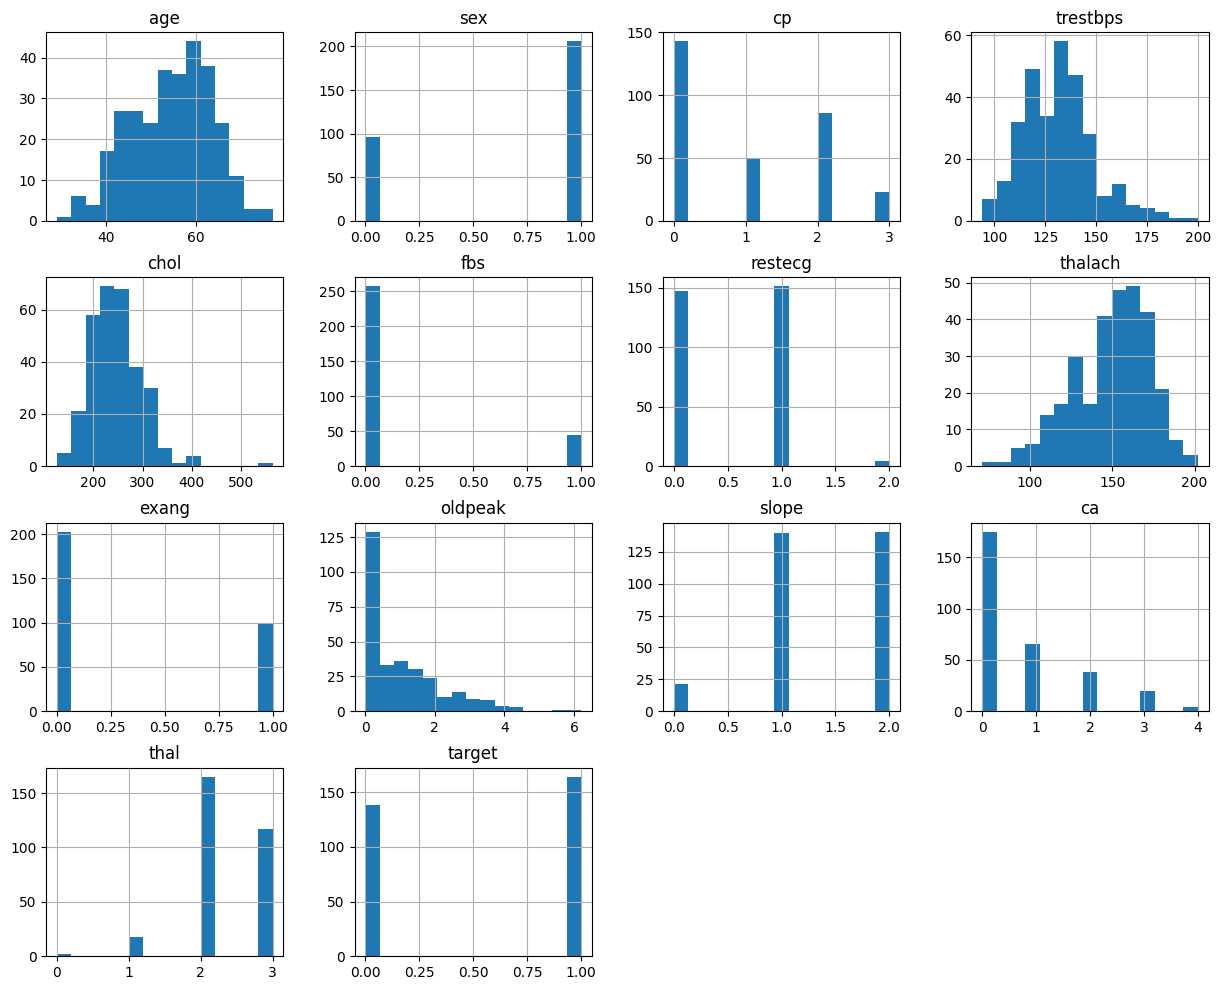

In [20]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

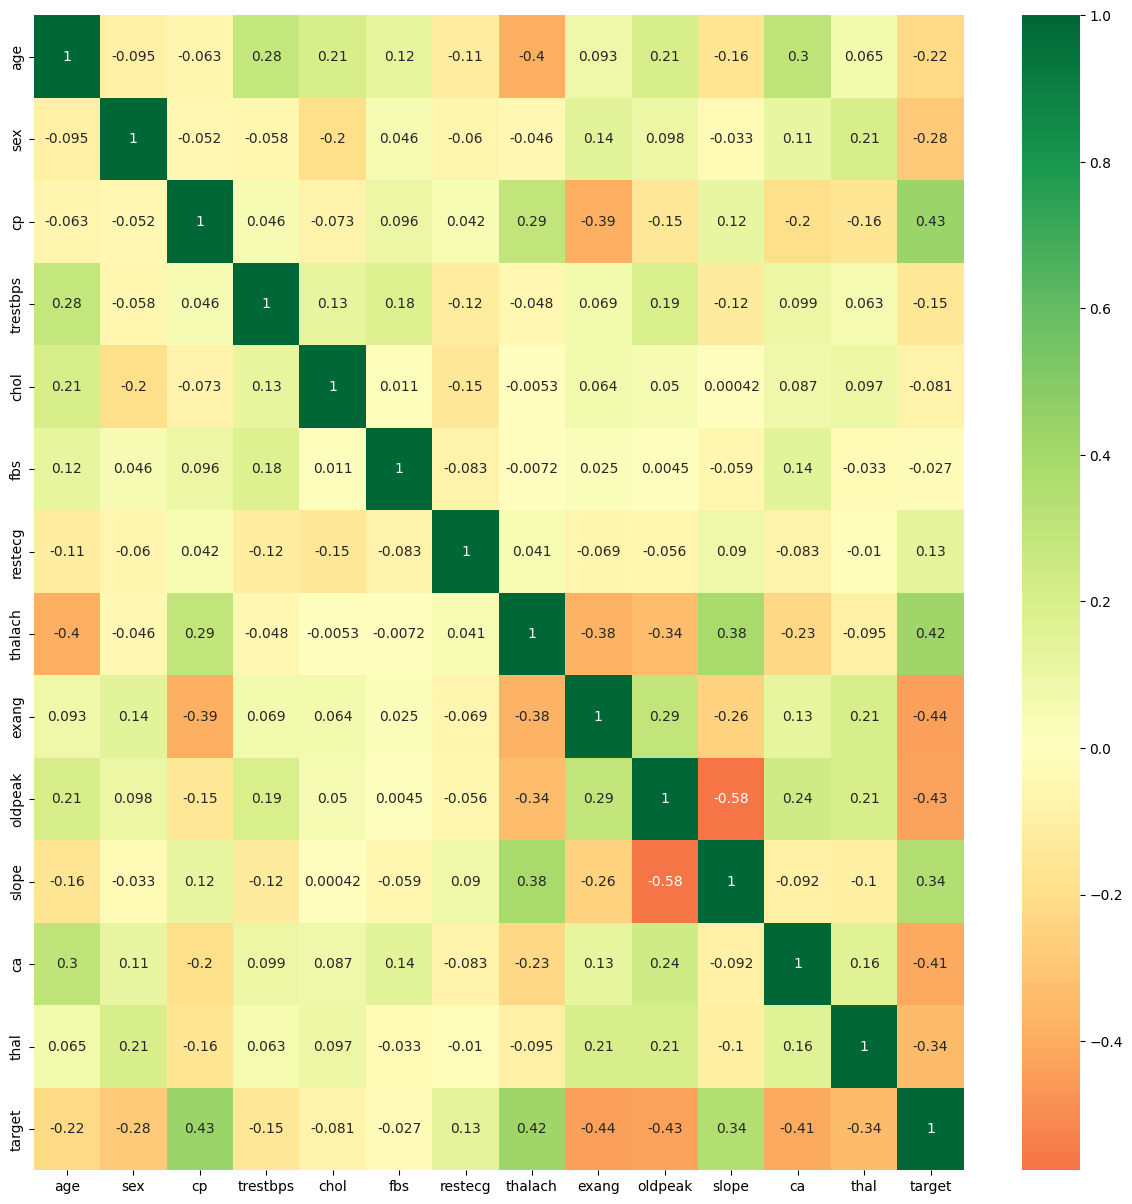

In [21]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0) 

In [24]:
# Separate the features and target
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target (whether an individual defaults)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((241, 13), (61, 13))

In [30]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model
log_reg = LogisticRegression()
#The fit function is used to train a machine learning model on a given dataset
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the performance
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)

Logistic Regression Performance:
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384615


In [32]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_log)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[24  5]
 [ 4 28]]


Text(0.5, 23.52222222222222, 'Predicted label')

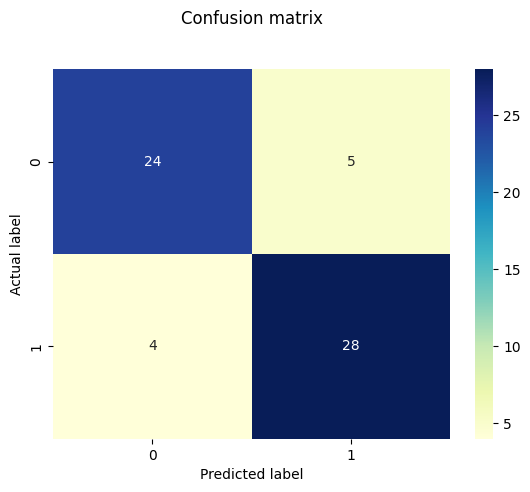

In [35]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [37]:
# Predict using the test set
y_pred_nb = gnb.predict(X_test)

# Evaluate the model performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Accuracy: ",accuracy_nb)
print("Precision: ",precision_nb)
print("Recall: ",recall_nb)
print("F1 Score: ",f1_nb)

Accuracy:  0.8852459016393442
Precision:  0.9310344827586207
Recall:  0.84375
F1 Score:  0.8852459016393444


In [38]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[27  2]
 [ 5 27]]


Text(0.5, 23.52222222222222, 'Predicted label')

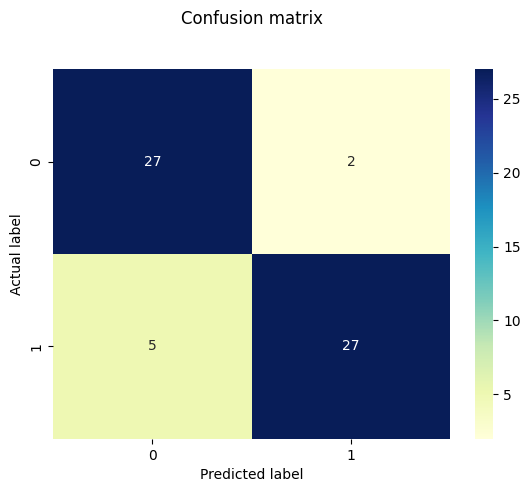

In [41]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
# instantiate the model
svc = SVC() 

# fit the model
svc.fit(X_train, y_train)

SVC()

In [44]:
# Predict using the test set
y_pred_svm = svc.predict(X_test)

# Evaluate the model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Accuracy: ",accuracy_svm)
print("Precision: ",precision_svm)
print("Recall: ",recall_svm)
print("F1 Score: ",f1_svm)

Accuracy:  0.7049180327868853
Precision:  0.675
Recall:  0.84375
F1 Score:  0.75


In [45]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.68      0.84      0.75        32

    accuracy                           0.70        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.70      0.70        61



In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[16 13]
 [ 5 27]]


Text(0.5, 23.52222222222222, 'Predicted label')

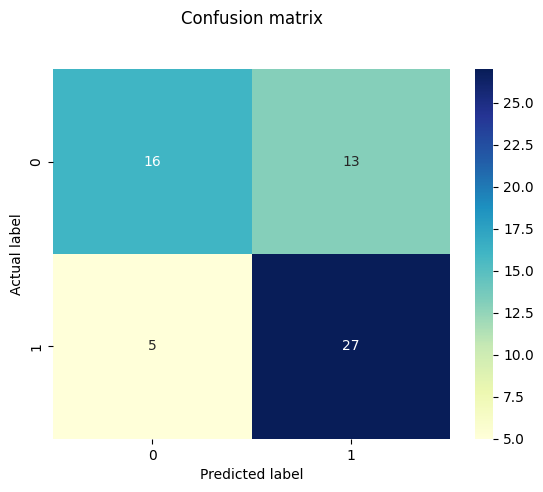

In [47]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
# Import the KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=20)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [57]:
# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("KNN Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

KNN Performance:
Accuracy: 0.6557377049180327
Precision: 0.6571428571428571
Recall: 0.71875
F1 Score: 0.6865671641791045


In [58]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        29
           1       0.66      0.72      0.69        32

    accuracy                           0.66        61
   macro avg       0.66      0.65      0.65        61
weighted avg       0.66      0.66      0.65        61



In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[17 12]
 [ 9 23]]


Text(0.5, 23.52222222222222, 'Predicted label')

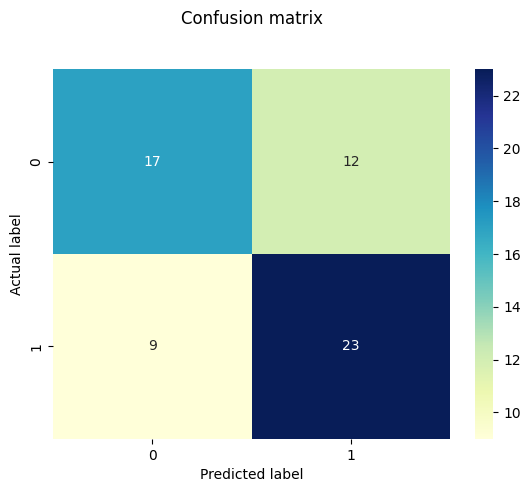

In [61]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Decision Tree Performance:
Accuracy: 0.8032786885245902
Precision: 0.8571428571428571
Recall: 0.75
F1 Score: 0.7999999999999999


In [64]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        29
           1       0.66      0.72      0.69        32

    accuracy                           0.66        61
   macro avg       0.66      0.65      0.65        61
weighted avg       0.66      0.66      0.65        61



In [65]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[25  4]
 [ 8 24]]


Text(0.5, 23.52222222222222, 'Predicted label')

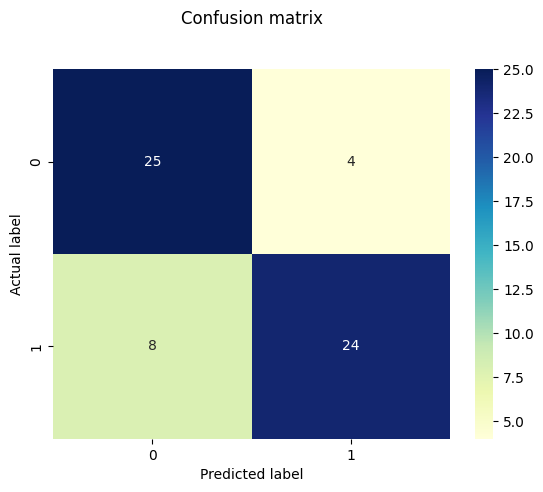

In [66]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Predict using the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Accuracy: ",accuracy_rf)
print("Precision: ",precision_rf)
print("Recall: ",recall_rf)
print("F1 Score: ",f1_rf)

Accuracy:  0.8688524590163934
Precision:  0.9
Recall:  0.84375
F1 Score:  0.870967741935484


In [71]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [72]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[26  3]
 [ 5 27]]


Text(0.5, 23.52222222222222, 'Predicted label')

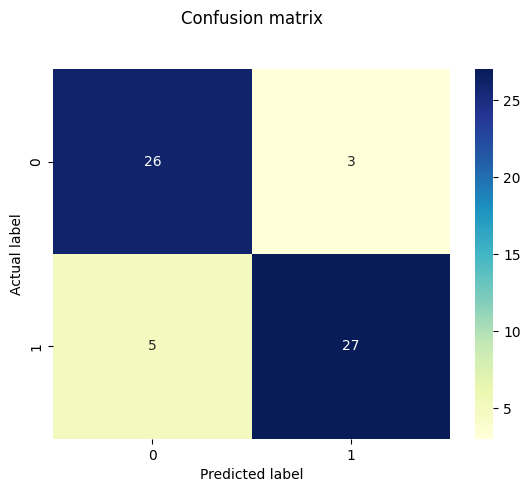

In [73]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [76]:
# Predict using the test set
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model performance
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

print("Accuracy: ",accuracy_ada)
print("Precision: ",precision_ada)
print("Recall: ",recall_ada)
print("F1 Score: ",f1_ada)

Accuracy:  0.7868852459016393
Precision:  0.88
Recall:  0.6875
F1 Score:  0.7719298245614036


In [77]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ada)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[26  3]
 [10 22]]


Text(0.5, 23.52222222222222, 'Predicted label')

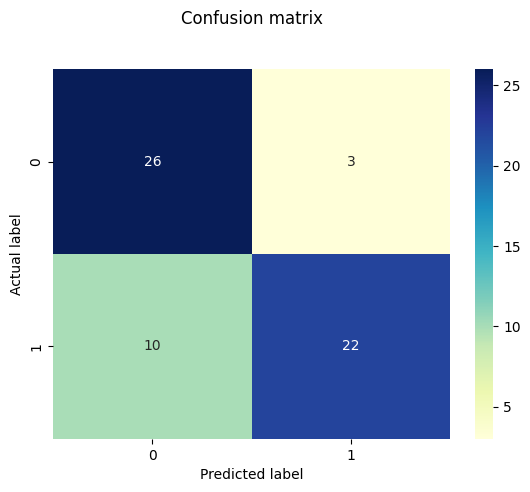

In [79]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [80]:
# Compare performance across models
models = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree (DT)', 'Random Forest', 'AdaBoost']
accuracies = [accuracy_log, accuracy_nb, accuracy_svm, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_ada]
precisions = [precision_log, precision_nb, precision_svm, precision_knn, precision_dt, precision_rf, precision_ada]
recalls = [recall_log, recall_nb, recall_svm, recall_knn, recall_dt, recall_rf, recall_ada]
f1_scores = [f1_log, f1_nb, f1_svm, f1_knn, f1_dt, f1_rf, f1_ada]

performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

print(performance_df)

                    Model  Accuracy  Precision   Recall  F1 Score
0     Logistic Regression  0.852459   0.848485  0.87500  0.861538
1             Naive Bayes  0.885246   0.931034  0.84375  0.885246
2  Support Vector Machine  0.704918   0.675000  0.84375  0.750000
3     K-Nearest Neighbors  0.655738   0.657143  0.71875  0.686567
4      Decision Tree (DT)  0.803279   0.857143  0.75000  0.800000
5           Random Forest  0.868852   0.900000  0.84375  0.870968
6                AdaBoost  0.786885   0.880000  0.68750  0.771930
